In [2]:
# Import Package yang dibutuhkan
import numpy as np 
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold 


In [3]:
# Menampilkan data
df = pd.read_csv('data.csv', sep=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [4]:
# Ukuran dataset
df.shape

(4424, 37)

In [5]:
# Menampilkan nama-nama kolom pada dataset ini
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [6]:
# Menampilkan jenis tipe data pada setiap kolom
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

### Encoding Kolom Target

In [7]:
# Melakukan encoding pada kolom Target agar bisa dilakukan prediksi
df['Target'] = df['Target'].replace({'Dropout': 0, 'Graduate': 1, 'Enrolled':2}) 

In [8]:
# Drop baris yang kolom "Target" nya memiliki value 'Enrolled' karena kita ingin memprediksi apakah student Dropout atau Graduate. Maka, value Enrolled tidak dibutuhkan
df.drop(df[df['Target'] == 2].index, inplace = True)

In [9]:
# Memastikan bahwa tipe datanya bukan object
df['Target'].value_counts()

1    2209
0    1421
Name: Target, dtype: int64

In [10]:
# Jumlah setiap value di kolom Target
df['Target'] = df['Target'].astype('int')

<function matplotlib.pyplot.show(close=None, block=None)>

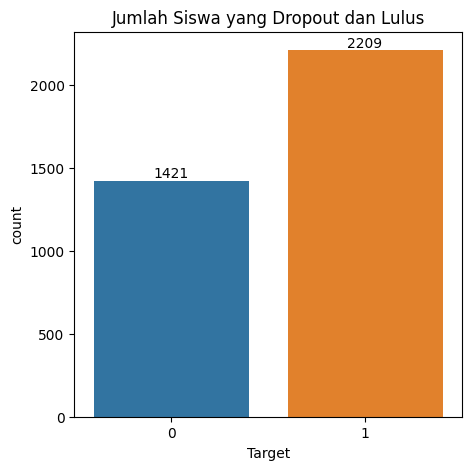

In [11]:
# Mengecek jumlah siswa yang dropout dan lulus 
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = 'Target')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Jumlah Siswa yang Dropout dan Lulus')
plt.show

Tampak bahwa jumlah siswa yang lulus jauh lebih banyak daripada jumlah siswa yang dropout

In [12]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


### Encoding Kolom Target

In [13]:
# Melakukan encoding pada kolom Target agar bisa dilakukan prediksi
df['Target'] = df['Target'].replace({'Dropout': 0, 'Graduate': 1, 'Enrolled':2}) 

In [14]:
# Drop baris yang kolom "Target" nya memiliki value 'Enrolled' karena kita ingin memprediksi apakah student Dropout atau Graduate. Maka, value Enrolled tidak dibutuhkan
df.drop(df[df['Target'] == 2].index, inplace = True)

In [15]:
# Memastikan bahwa tipe datanya bukan object
df['Target'].value_counts()

1    2209
0    1421
Name: Target, dtype: int64

In [16]:
# Jumlah setiap value di kolom Target
df['Target'] = df['Target'].astype('int')

<function matplotlib.pyplot.show(close=None, block=None)>

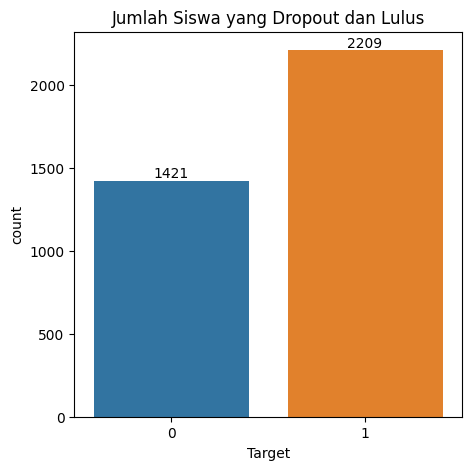

In [17]:
# Mengecek jumlah siswa yang dropout dan lulus 
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = 'Target')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Jumlah Siswa yang Dropout dan Lulus')
plt.show

Tampak bahwa jumlah siswa yang lulus jauh lebih banyak daripada jumlah siswa yang dropout

In [18]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


# **Modelling**
#### Membagi data menjadi X dan y
#### X adalah feature-feature yang digunakan
#### y adalah kolom yang akan kita prediksi, yaitu Target

In [19]:
# Memisahkan variabel independen (X) dengan variabel dependen (y)
X = df[['Marital status', 'GDP', 'Curricular units 1st sem (credited)', 'Age at enrollment', 'Scholarship holder', 
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']]
# X = df.drop(['Target'], axis = 1)
y = df['Target']

print(X.shape)
print(y.shape)

(3630, 16)
(3630,)


#### Melakukan Standarisasi

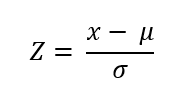

In [20]:
# Fungsi untuk melakukan standarisasi
# Penjelasan parameter:
# df: dataframe yang akan distandarisasi
def standarisasi(df):
    return (df - df.mean()) / df.std()

In [21]:
# Melakukan standarisasi pada setiap feature di X
X = standarisasi(X)

In [22]:
# # Mengubah X menjadi array agar bisa dilakukan modelling
# X = X.values
# X

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 92)

In [24]:
# Inisiasi array kosong untuk menampung rata-rata akurasi prediksi dari tiap model
avg_train_arr = []
avg_test_arr = []

In [25]:
# Fungsi untuk menghitung akurasi
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [26]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Assuming you have already loaded your data into X (features) and y (target)

# Define the CatBoostClassifier model
model = CatBoostClassifier()

# Define the parameter grid for grid search
param_grid = {
    'iterations': [100, 200, 300],  # Number of boosting iterations
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'depth': [4, 6, 8]  # Depth of the trees
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

0:	learn: 0.6431530	total: 147ms	remaining: 14.5s
1:	learn: 0.5961173	total: 148ms	remaining: 7.24s
2:	learn: 0.5586492	total: 149ms	remaining: 4.8s
3:	learn: 0.5273429	total: 149ms	remaining: 3.58s
4:	learn: 0.5008672	total: 150ms	remaining: 2.85s
5:	learn: 0.4775662	total: 151ms	remaining: 2.36s
6:	learn: 0.4556117	total: 152ms	remaining: 2.02s
7:	learn: 0.4388294	total: 153ms	remaining: 1.75s
8:	learn: 0.4243679	total: 153ms	remaining: 1.55s
9:	learn: 0.4141981	total: 154ms	remaining: 1.39s
10:	learn: 0.4013014	total: 155ms	remaining: 1.25s
11:	learn: 0.3892850	total: 156ms	remaining: 1.14s
12:	learn: 0.3803478	total: 157ms	remaining: 1.05s
13:	learn: 0.3713735	total: 158ms	remaining: 969ms
14:	learn: 0.3643653	total: 158ms	remaining: 898ms
15:	learn: 0.3564967	total: 160ms	remaining: 837ms
16:	learn: 0.3487147	total: 161ms	remaining: 784ms
17:	learn: 0.3439647	total: 162ms	remaining: 736ms
18:	learn: 0.3373607	total: 162ms	remaining: 692ms
19:	learn: 0.3336919	total: 163ms	remainin

28:	learn: 0.5647100	total: 24.1ms	remaining: 59ms
29:	learn: 0.5612504	total: 25ms	remaining: 58.3ms
30:	learn: 0.5580870	total: 25.7ms	remaining: 57.2ms
31:	learn: 0.5547411	total: 26.4ms	remaining: 56.1ms
32:	learn: 0.5512116	total: 27.3ms	remaining: 55.3ms
33:	learn: 0.5478017	total: 27.9ms	remaining: 54.2ms
34:	learn: 0.5445801	total: 28.6ms	remaining: 53.2ms
35:	learn: 0.5415371	total: 29.2ms	remaining: 51.9ms
36:	learn: 0.5385488	total: 29.9ms	remaining: 50.9ms
37:	learn: 0.5354009	total: 30.7ms	remaining: 50ms
38:	learn: 0.5324102	total: 31.4ms	remaining: 49.2ms
39:	learn: 0.5294557	total: 32.2ms	remaining: 48.3ms
40:	learn: 0.5264121	total: 32.9ms	remaining: 47.4ms
41:	learn: 0.5235168	total: 33.7ms	remaining: 46.5ms
42:	learn: 0.5208451	total: 34.3ms	remaining: 45.5ms
43:	learn: 0.5180377	total: 35ms	remaining: 44.6ms
44:	learn: 0.5150679	total: 35.8ms	remaining: 43.7ms
45:	learn: 0.5124978	total: 36.7ms	remaining: 43.1ms
46:	learn: 0.5099768	total: 37.4ms	remaining: 42.2ms
4

In [27]:
accuracy(y_test, y_pred)

0.9173553719008265

In [ ]:
inputan = np.array([[1, 3, 0, 17, 1, 8, 12, 8, 13, 0, 0, 8, 12, 8, 14, 0]])
y_pred_inputan = best_model.predict(inputan)

In [ ]:
y_pred_inputan

array([1], dtype=int64)

In [706]:
import pickle
with open('student_dropout_model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

In [707]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [709]:
with open('student_dropout_model.pickle', 'rb') as f:
    model = pickle.load(f)

In [710]:
y_pred_inputan = model.predict(inputan)
y_pred_inputan

array([1], dtype=int64)